In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
pd.set_option('display.max_columns', None)

In [58]:
df = pd.read_csv('data_for_models.csv')

In [59]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                            Company Name         Location    Headquarters  \
0                      Tecolote Research  Albuquerque, NM      Goleta, CA   
1  University of Maryland Medical System    Linthicum, MD   Baltimore, MD   
2                                KnowBe4   Clearwater, FL  Clearwater, FL   
3                                   PNNL     Richland, WA    Richland, WA   
4                     Affinity Solutions     New York, NY    New York, NY   

                     Size  Founded   Type of ownership  \
0   501 to 1000 employees     1973   Company - Private   
1        10000+ employees     1984  Other Organization   
2   501 to 1000 employees     2010   Company - Private   
3  1001 to 5000 employees     1965          Government   
4     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  emp_provided  \
0                                                 -1       0             0   
1                                                 -1       0             0   
2                                                 -1       0             0   
3  Oak Ridge National Laboratory, National Renewa...       0             0   
4               Commerce Signals, Cardlytics, Yodlee       0             0   

        salary  min_salary  max_salary    avg job_state  HQ_job  age  python  \
0    53 - 91            53          91   72.0        NM       0   49       1   
1   63 - 112            63         112   87.5        MD       0   38       1   
2    80 - 90            80          90   85.0        FL       1   12       1   
3    56 - 97            56          97   76.5        WA       1   57       1   
4   86 - 143            86         143  114.5        NY       1   24       1   

   spark  excel  aws  r_studio        job_simp seniority  desc_len  \
0      0      1    0         0  data scientist        na      2536   
1      0      0    0         0  data scientist        na      4783   
2      1      1    0         0  data scientist        na      3461   
3      0      0    0         0  data scientist        na      3883   
4      0      1    0         0  data scientist        na      2728   

  ownership_types  num_comp  
0         private         1  
1              na         1  
2         private         1  
3              na         3  
4         private         3

In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'salary', 'min_salary', 'max_salary', 'avg',
       'job_state', 'HQ_job', 'age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority', 'desc_len', 'ownership_types',
       'num_comp'],
      dtype='object')

In [61]:
df=df[['Rating', 'Size', 'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary', 'avg', 'job_state', 'HQ_job','age', 'python', 'spark', 'excel', 'aws',
       'r_studio', 'job_simp', 'seniority', 'desc_len', 'ownership_types',
       'num_comp']]

In [62]:
df

Rating                    Size                          Industry  \
0       3.8   501 to 1000 employees               Aerospace & Defense   
1       3.4        10000+ employees  Health Care Services & Hospitals   
2       4.8   501 to 1000 employees                 Security Services   
3       3.8  1001 to 5000 employees                            Energy   
4       2.9     51 to 200 employees           Advertising & Marketing   
..      ...                     ...                               ...   
737     3.9        10000+ employees         Biotech & Pharmaceuticals   
738     4.4  1001 to 5000 employees                          Internet   
739     2.6   501 to 1000 employees           Colleges & Universities   
740     3.2       1 to 50 employees            Staffing & Outsourcing   
741     3.6   501 to 1000 employees                  Federal Agencies   

                           Sector                           Revenue  hourly  \
0             Aerospace & Defense         $50 to $100 million (USD)       0   
1                     Health Care            $2 to $5 billion (USD)       0   
2               Business Services        $100 to $500 million (USD)       0   
3    Oil, Gas, Energy & Utilities  $500 million to $1 billion (USD)       0   
4               Business Services          Unknown / Non-Applicable       0   
..                            ...                               ...     ...   
737     Biotech & Pharmaceuticals                $10+ billion (USD)       0   
738        Information Technology        $100 to $500 million (USD)       0   
739                     Education          Unknown / Non-Applicable       0   
740             Business Services           $5 to $10 million (USD)       0   
741                    Government         $50 to $100 million (USD)       0   

     min_salary  max_salary    avg job_state  HQ_job  age  python  spark  \
0            53          91   72.0        NM       0   49       1      0   
1            63         112   87.5        MD       0   38       1      0   
2            80          90   85.0        FL       1   12       1      1   
3            56          97   76.5        WA       1   57       1      0   
4            86         143  114.5        NY       1   24       1      0   
..          ...         ...    ...       ...     ...  ...     ...    ...   
737          58         111   84.5        MA       0  192       0      0   
738          72         133  102.5        TN       0   16       1      1   
739          56          91   73.5        PA       1   38       0      0   
740          95         160  127.5        PA       0   -1       0      0   
741          61         126   93.5        OH       0   55       1      0   

     excel  aws  r_studio        job_simp seniority  desc_len  \
0        1    0         0  data scientist        na      2536   
1        0    0         0  data scientist        na      4783   
2        1    0         0  data scientist        na      3461   
3        0    0         0  data scientist        na      3883   
4        1    0         0  data scientist        na      2728   
..     ...  ...       ...             ...       ...       ...   
737      0    1         0              na    senior      6162   
738      0    1         0   data engineer    senior      6130   
739      1    0         0              na        na      3078   
740      1    0         0         manager        na      1642   
741      0    0         0              na        na      3673   

             ownership_types  num_comp  
0                    private         1  
1                         na         1  
2                    private         1  
3                         na         3  
4                    private         3  
..                       ...       ...  
737                   public         3  
738                   public         3  
739  educational institution         1  
740                  private         1  
741                       na      

In [63]:
df.head()

Rating                    Size                          Industry  \
0     3.8   501 to 1000 employees               Aerospace & Defense   
1     3.4        10000+ employees  Health Care Services & Hospitals   
2     4.8   501 to 1000 employees                 Security Services   
3     3.8  1001 to 5000 employees                            Energy   
4     2.9     51 to 200 employees           Advertising & Marketing   

                         Sector                           Revenue  hourly  \
0           Aerospace & Defense         $50 to $100 million (USD)       0   
1                   Health Care            $2 to $5 billion (USD)       0   
2             Business Services        $100 to $500 million (USD)       0   
3  Oil, Gas, Energy & Utilities  $500 million to $1 billion (USD)       0   
4             Business Services          Unknown / Non-Applicable       0   

   min_salary  max_salary    avg job_state  HQ_job  age  python  spark  excel  \
0          53          91   72.0        NM       0   49       1      0      1   
1          63         112   87.5        MD       0   38       1      0      0   
2          80          90   85.0        FL       1   12       1      1      1   
3          56          97   76.5        WA       1   57       1      0      0   
4          86         143  114.5        NY       1   24       1      0      1   

   aws  r_studio        job_simp seniority  desc_len ownership_types  num_comp  
0    0         0  data scientist        na      2536         private         1  
1    0         0  data scientist        na      4783              na         1  
2    0         0  data scientist        na      3461         private         1  
3    0         0  data scientist        na      3883              na         3  
4    0         0  data scientist        na      2728         private         3

In [70]:
df=df.drop(['min_salary','max_salary'], axis=1)

In [71]:
df= pd.get_dummies(df, drop_first=True)

In [72]:
df

Rating  hourly    avg  HQ_job  age  python  spark  excel  aws  r_studio  \
0       3.8       0   72.0       0   49       1      0      1    0         0   
1       3.4       0   87.5       0   38       1      0      0    0         0   
2       4.8       0   85.0       1   12       1      1      1    0         0   
3       3.8       0   76.5       1   57       1      0      0    0         0   
4       2.9       0  114.5       1   24       1      0      1    0         0   
..      ...     ...    ...     ...  ...     ...    ...    ...  ...       ...   
737     3.9       0   84.5       0  192       0      0      0    1         0   
738     4.4       0  102.5       0   16       1      1      0    1         0   
739     2.6       0   73.5       1   38       0      0      1    0         0   
740     3.2       0  127.5       0   -1       0      0      1    0         0   
741     3.6       0   93.5       0   55       1      0      0    0         0   

     desc_len  num_comp  Size_1 to 50 employees  Size_10000+ employees  \
0        2536         1                       0                      0   
1        4783         1                       0                      1   
2        3461         1                       0                      0   
3        3883         3                       0                      0   
4        2728         3                       0                      0   
..        ...       ...                     ...                    ...   
737      6162         3                       0                      1   
738      6130         3                       0                      0   
739      3078         1                       0                      0   
740      1642         1                       1                      0   
741      3673         1                       0                      0   

     Size_1001 to 5000 employees  Size_201 to 500 employees  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   
..                           ...                        ...   
737                            0                          0   
738                            1                          0   
739                            0                          0   
740                            0                          0   
741                            0                          0   

     Size_5001 to 10000 employees  Size_501 to 1000 employees  \
0                               0                           1   
1                               0                           0   
2                               0                           1   
3                               0                           0   
4                               0                           0   
..                            ...                         ...   
737                             0                           0   
738                             0                           0   
739                             0                           1   
740                             0                           0   
741                             0                           1   

     Size_51 to 200 employees  Size_Unknown  Industry_Accounting  \
0                           0             0                    0   
1                           0             0                    0   
2                           0             0                    0   
3                           0             0                    0   
4                           1             0                    0   
..                        ...           ...                  ...   
737                         0             0                    0   
738                         0             0                    0   
739  

In [73]:
X = df.drop('avg', axis=1)

In [79]:
y = df['avg']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=42)

In [82]:
scaler = StandardScaler()

In [83]:
scaled_X_train = scaler.fit_transform(X_train)

In [84]:
scaled_X_test = scaler.transform(X_test)

In [235]:

def eval(model):
    eval_metrics=[]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_pred,y_test)
    eval_metrics.append(mae)
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mean_squared_error(y_pred,y_test))
    eval_metrics.append(rmse)
    mape = mean_absolute_percentage_error(y_pred,y_test)
    eval_metrics.append(mape)
    return('MAE: ' + str(eval_metrics[0]) +'  RMSE: ' + str(eval_metrics[1]) + '  MAPE: ' + str(eval_metrics[2]))
    

In [248]:
def Grid(model, param_grid):
    grid = GridSearchCV(model,param_grid,scoring='neg_mean_squared_error' , verbose=1, cv=5)
    grid.fit(X_train,y_train)
    best_param = grid.best_estimator_
    return(eval(best_param))

### Linear Regression

In [87]:
linear_model = LinearRegression()

In [155]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [156]:
eval(linear_model)

[20.33779237499904, 701.2906841626293, 26.481893515431054]

### Ridge Regression

In [253]:
ridge_model = Ridge(alpha=1, max_iter=1000)
eval(ridge_model)

'MAE: 19.67883482373981  RMSE: 25.561065458038872  MAPE: 0.2045752169626852'

### Lasso Regression

In [249]:
lasso_model = Lasso()
param_grid={'alpha':[0.1,0.2,0.5,0.9,0.99,1], 'max_iter':[50,100,1000,10000]}
Grid(lasso_model,param_grid)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+02, tolerance: 6.420e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+03, tolerance: 6.520e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.757e+04, tolerance: 

'MAE: 20.388082519352675  RMSE: 26.329434450983815  MAPE: 0.20297297387555527'

In [201]:
alpha=[]
error_mae=[]
error_rmse=[]

for i in range(1,100):
    alpha.append(i/100)
    lasso_model = Lasso(alpha=(i/100))
    lasso_model.fit(X_train,y_train)
    y_pred = lasso_model.predict(X_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    rmse=np.sqrt(mse)
    error_mae.append(mae)
    error_rmse.append(rmse)

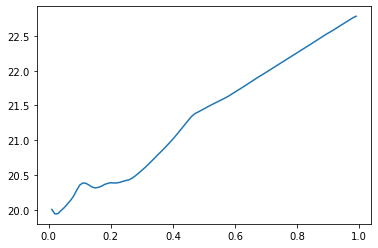

In [202]:
plt.plot(alpha,error_mae)
plt.show()

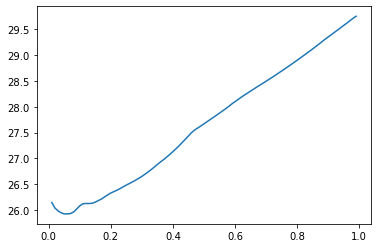

In [203]:
plt.plot(alpha,error_rmse)
plt.show()

### Random Forest

In [222]:
model_rf = RandomForestRegressor()
param_grid_rf={'n_estimators':[100,130,150,170,200]}
Grid(model_rf, param_grid_rf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomForestRegressor()

In [236]:
eval(model_rf)

'MAE: 12.813744394618835  RMSE: 19.88251534589677  MAPE: 0.12293349994222423'